In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from src import *
from model.classification import *

from tqdm.notebook import tqdm
from easydict import EasyDict
from IPython.display import HTML
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

def show_video(file):
    return HTML(f"""
    <video width="{1920 * 0.3}" height="{1080 * 0.3}" controls>
        <source src="data/video/{file}.MP4" type="video/mp4">
    </video>
    """)

params = EasyDict()
params.n_fft = 1024
params.n_mels = 64
params.hop_length = 128
params.sr = 44100
predictions = None

In [128]:
# file = '20190819-Kutna Hora-L4-out-MVI_0040'
# file = '20190819-Ricany-L6-in-MVI_0008'
file = '20190819-Kutna Hora-L18-out-MVI_0045'

signal = load_audio(f'data/audio/{file}.MP4.wav')
csv = load_csv(f'{file}.MP4')
events = load_events_from_csv(csv)
directions = load_directions_from_csv(csv)
views = load_views_from_csv(csv)

try:
    manual_events = load_events(f'data/labels/{file}.MP4.txt')
except:
    manual_events = None

events_start_time, events_end_time = load_event_time_from_csv(csv)

In [131]:
uuid = 1633695693
# from_time = 25 * 60
# till_time = 34 * 60
from_time = 28 * 60
till_time = 29 * 60

model, params = load_model(uuid)
transform = create_transformation(params)
predictions, probabilities = validate(signal, model, transform, params, from_time=from_time, till_time=till_time, return_probs=True)

28:00 - 29:00


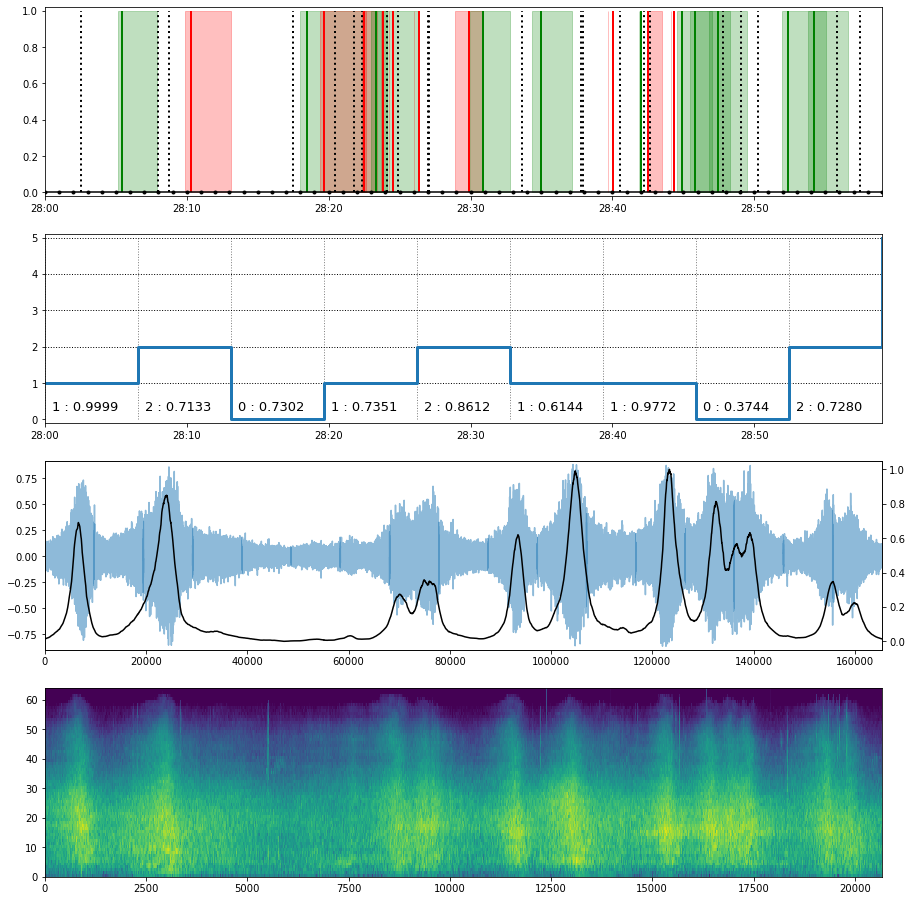

In [132]:
show(
    params,
    signal=signal,
    events=events, 
    predictions=predictions,
    probabilities=probabilities,
    events_start_time=events_start_time,
    events_end_time=events_end_time,
    manual_events=manual_events,
    views=views,
    from_time=from_time,
    till_time=till_time,
    save=False
)

show_video(file)